Задание

Загрузите набор данных sandler.csv - набор данных для предсказания дохода от показа фильмов.

Столбцы Date - дата премьеры, Title - название, Genre - жанр, Studio - студия Theaters - число кинотеатров, Opening Gross - доход от премьеры, Opening Theaters - число кинотеатров для премьеры, Gross - общий доход

В качестве х возьмите: Theaters / Opening / Opening Theaters

В качестве y - Gross

Постройте линейную регрессию для этих данных, постарайтесь получить высокий R squared и низкие ошибки (посоревнуемся, кто сделает правильно и получит наибольший возможный R squared))



In [1]:
# библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/sandler.csv')
df.head()

,Date,Title,Genre,Studio,Theaters,Opening Gross,Opening Theaters,Gross
0,13.03.1992,Shakes the Clown,Comedy,IRS,9,$35 589,9,$115 103
1,23.07.1993,Coneheads,Comedy,Par.,1 978,$7 100 501,1 978,$21 274 717
2,05.08.1994,Airheads,Comedy,Fox,1 229,$1 911 739,1 228,$5 751 882
3,21.12.1994,Mixed Nuts,Comedy,Sony,1 318,$2 307 850,1 318,$6 821 850
4,10.02.1995,Billy Madison,Comedy,Uni.,1 887,$6 639 080,1 834,$25 588 734


In [3]:
df.shape

(31, 8)

In [117]:
# сделайте предобработку - она уже прописана
df['Opening Theaters']=df['Opening Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Theaters']=df['Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Gross']=df['Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Opening Gross']=df['Opening Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df.drop(['Date','Title', 'Genre', 'Studio'], axis=1, inplace=True)
df['Opening Theaters'] = pd.to_numeric( df['Opening Theaters'])
df['Theaters'] = pd.to_numeric( df['Theaters'])
df['Gross'] = pd.to_numeric( df['Gross'])
df['Opening Gross'] = pd.to_numeric( df['Opening Gross'])
x, y = df.drop(["Gross"], axis = 1), df['Gross']
# обучите модель на x, y
# сделайте предсказание

In [118]:
df['Theaters'].corr(df['Gross'])
# растет кол-во кинотеатров растет и выручка

0.8166224250384043

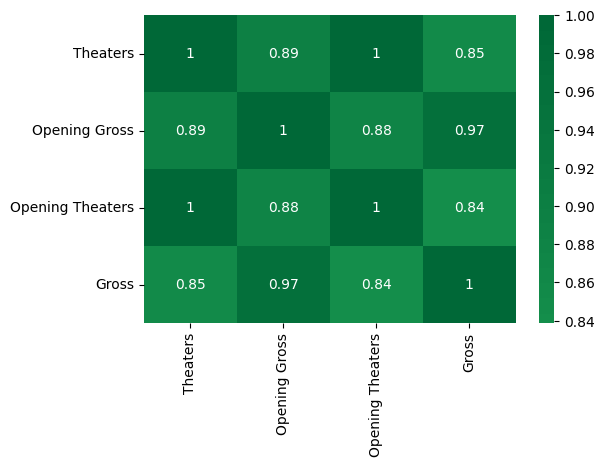

In [119]:
plt.figure(figsize = (6,4))
sns.heatmap(df[['Theaters', 'Opening Gross', 'Opening Theaters','Gross']].corr(method='spearman'), annot = True, cmap='RdYlGn', center=0);

In [120]:
x = df[['Theaters', 'Opening Gross', 'Opening Theaters']] # добавили показатели
y = df['Gross']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

regr = LinearRegression()
result = regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

In [121]:
print('Training data r-squared:', regr.score(x_train, y_train)) # коэффициент детерминации(точности)
print('Test data r-squared', regr.score(x_test,y_test))
print('Intercept', regr.intercept_)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred) # средняя разница по модулю между реальными и предсказанными значениями
meanSqErr = metrics.mean_squared_error(y_test, y_pred) # средний квадрат разницы между реальными и предсказанными значениями
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) # корень из предыдущей ошибки
print()
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


Training data r-squared: 0.9324834430968852
Test data r-squared 0.9256346550623216
Intercept -31317.306060373783

Mean Absolute Error: 10772823.274504079
Mean Square Error: 215896367776861.94
Root Mean Square Error: 14693412.393888015


Страдает показатель intercept и ошибка ненормальная.

Требуется преобразовать данные

<h2>попробуем преобразовать данные</h2>

In [84]:
# возьмем логорифм от выручек. Так у нас гросс будет расти не в 150раз(образно), а в 2-3

y_log = np.log(df[['Opening Gross', 'Gross']])

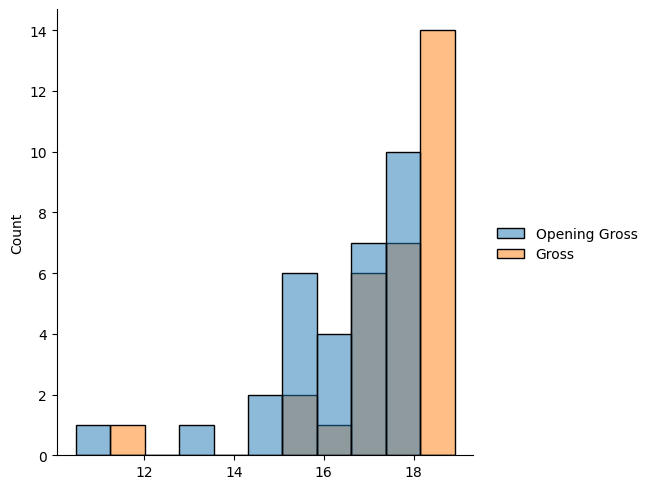

In [85]:
sns.displot(y_log)
plt.show()

посмотрим что изменилось в поведении модели

In [124]:
df2 = df.copy()

df2['Gross'] = np.log(df2[['Gross']])
df2['Opening Gross'] = np.log(df2['Opening Gross'])

features = df2[['Theaters','Opening Gross','Opening Theaters']]
gross = df2['Gross']

x_train, x_test, y_train, y_test = train_test_split(features, gross, test_size = 0.3, random_state = 100)

regr = LinearRegression()
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

In [127]:
print('Training data r-squared:', regr.score(x_train, y_train)) # коэффициент детерминации(точности)
print('Test data r-squared', regr.score(x_test,y_test))
print('Intercept', regr.intercept_)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred) # средняя разница по модулю между реальными и предсказанными значениями
meanSqErr = metrics.mean_squared_error(y_test, y_pred) # средний квадрат разницы между реальными и предсказанными значениями
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) # корень из предыдущей ошибки
print()
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Training data r-squared: 0.9890734458445624
Test data r-squared 0.9383963505811331
Intercept 2.195458710490561

Mean Absolute Error: 0.13950558711765132
Mean Square Error: 0.029601201011048062
Root Mean Square Error: 0.17204999567290916


Мы улучшили показатели predict и train!  
А еще MSE стала меньше

